In [51]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


In [52]:
# reading the dataset, printing first 5 rows.
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 
                  'Data')
print(df.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [53]:
#viewing the columns info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [54]:
# view quick statistical measures for continuous attributes:
df[['Age', 'Income', 'CCAvg']].describe()


,Age,Income,CCAvg
count,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,1.937913
std,11.463166,46.033729,1.747666
min,23.000000,8.000000,0.000000
25%,35.000000,39.000000,0.700000
50%,45.000000,64.000000,1.500000
75%,55.000000,98.000000,2.500000
max,67.000000,224.000000,10.000000


In [55]:
# quick measures with filters
df[df['Personal Loan'] ==1][['Age', 'Income','CCAvg']].describe()

,Age,Income,CCAvg
count,480.000000,480.000000,480.000000
mean,45.066667,144.745833,3.905347
std,11.590964,31.584429,2.097679
min,26.000000,60.000000,0.000000
25%,35.000000,122.000000,2.600000
50%,45.000000,142.500000,3.800000
75%,55.000000,172.000000,5.350000
max,65.000000,203.000000,10.000000


In [56]:
# dealing with missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [57]:
# dealing with missing values in Mortgage and Family
cols = ['Family', 'Mortgage']
for col in cols:
    df[col] = df[col].fillna(0)
    
df[['Family','Mortgage']].isna().sum()

Family      0
Mortgage    0
dtype: int64

In [58]:
#dealing with missing values in age and income
cols = ['Age', 'Income']
for col in cols:
    df[col] = df[col].fillna(df[col].mean())
    
df[['Age', 'Income']].isna().sum()

Age       0
Income    0
dtype: int64

In [59]:
# finding duplicate values in ID attribute
sum(df.duplicated(subset = ['ID']))

0

In [60]:
# removing duplicate values in ID attribute
df.drop_duplicates(subset = ['ID'], inplace = True)
sum(df.duplicated(subset = ['ID']))


0

In [61]:
# dropping unneded columns
df = df.drop(['ID'], axis = 1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [62]:
#viewing the ZIP code data
df_county = pd.read_csv("ZIP_County.csv")
df_county.head()

,ZIP Code,County Name
0,36003,Autauga County
1,36006,Autauga County
2,36067,Autauga County
3,36066,Autauga County
4,36703,Autauga County


In [63]:
#merging the ZIP code as a key.
df = pd.merge(df, df_county, how = 'inner', on = 'ZIP Code')
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,County Name
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,30,4,60,91107,4,2.2,2,0,0,0,0,1,0,Los Angeles County
2,35,10,200,91107,2,3.0,1,458,0,0,0,0,0,Los Angeles County
3,54,30,93,91107,1,2.7,2,0,0,0,0,1,0,Los Angeles County
4,37,12,169,91107,2,5.2,3,249,1,0,0,1,0,Los Angeles County


In [64]:
# naming columns
df.columns


Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'County Name'],
      dtype='object')

In [65]:
# removing negative values in experience column
print ("Shape Before Filtration: ", df.shape)
df = df[df['Experience']> 0]
print ("Shape After Filtration: ", df.shape)

Shape Before Filtration:  (5376, 14)
Shape After Filtration:  (5247, 14)


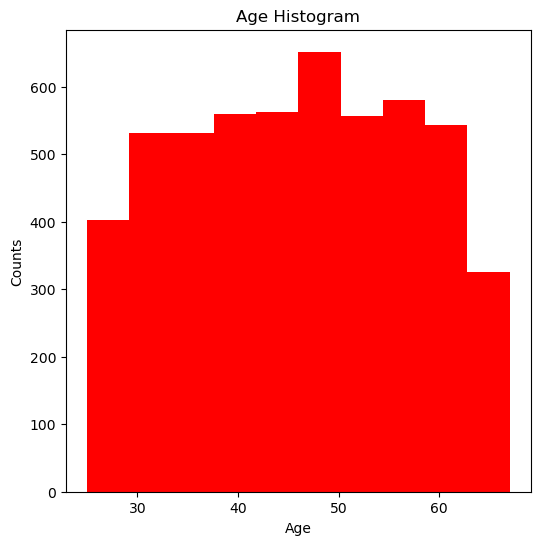

In [66]:
# histogram to show distribution as per age
fig = plt.figure(figsize = (6,6))
plt.hist(df['Age'], color = 'r')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts');

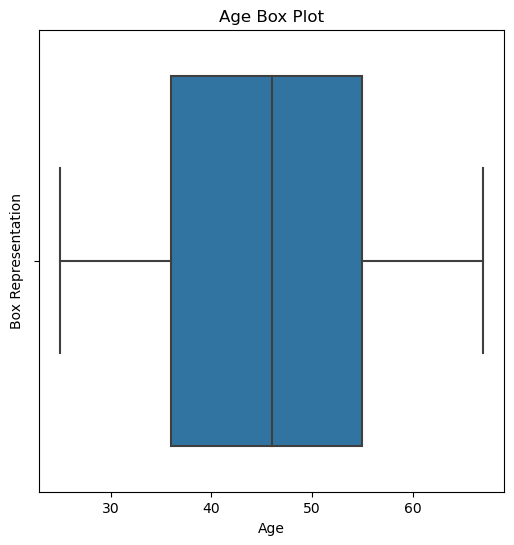

In [67]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = df['Age'])
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.ylabel('Box Representation');


Text(0, 0.5, 'Distribution')

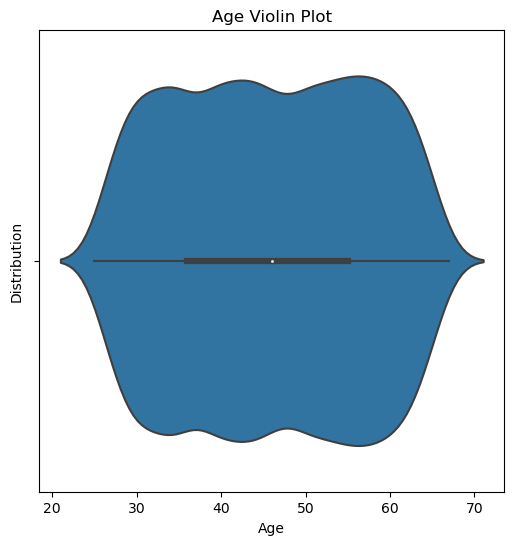

In [68]:
fig = plt.figure(figsize = (6,6))
sns.violinplot(x = df['Age'])
plt.title('Age Violin Plot')
plt.xlabel ('Age')
plt.ylabel('Distribution')


<Axes: xlabel='Education', ylabel='count'>

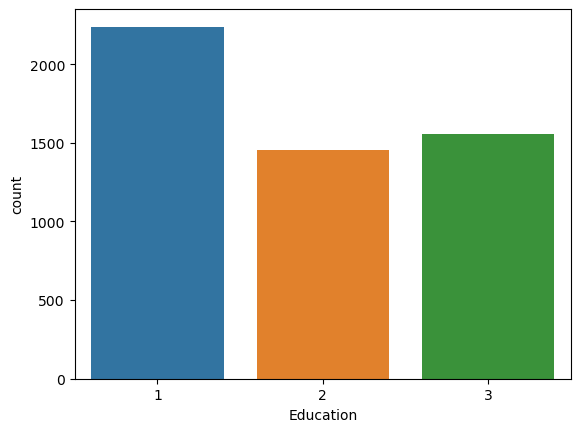

In [69]:
sns.countplot(x = "Education", data = df)


<Axes: xlabel='Education', ylabel='count'>

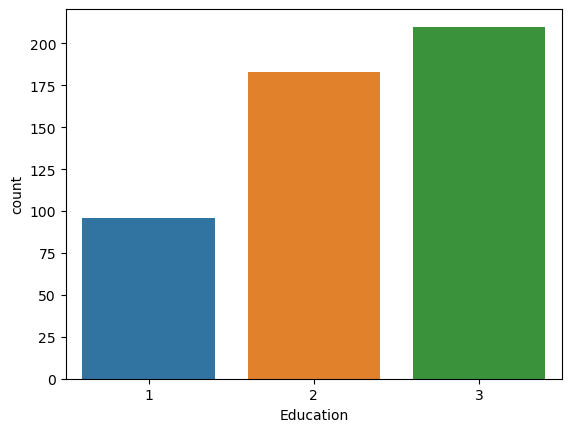

In [70]:
sns.countplot(x= 'Education', data = df[df['Personal Loan']== 1])

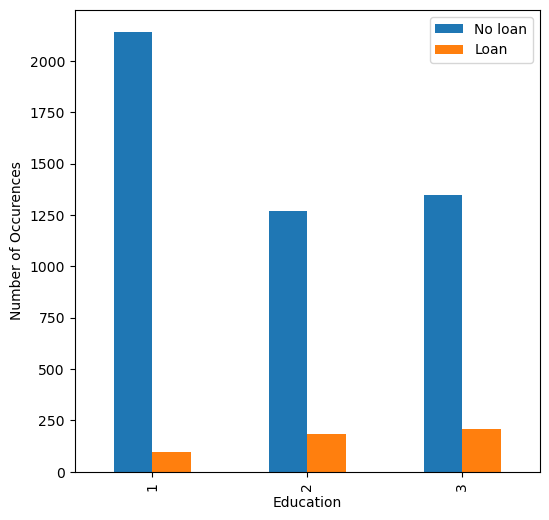

In [71]:
#crosstab visualization to show relationship between loans and type of education
pd.crosstab(df['Education'], df['Personal Loan']).plot(kind ="bar", figsize = (6,6))
plt.xlabel('Education')
plt.legend(['No loan', 'Loan'])
plt.ylabel('Number of Occurences')
plt.show();

In [72]:
#encoding county name
enc = OrdinalEncoder()

df[['County Name']] = enc.fit_transform(df[['County Name']])

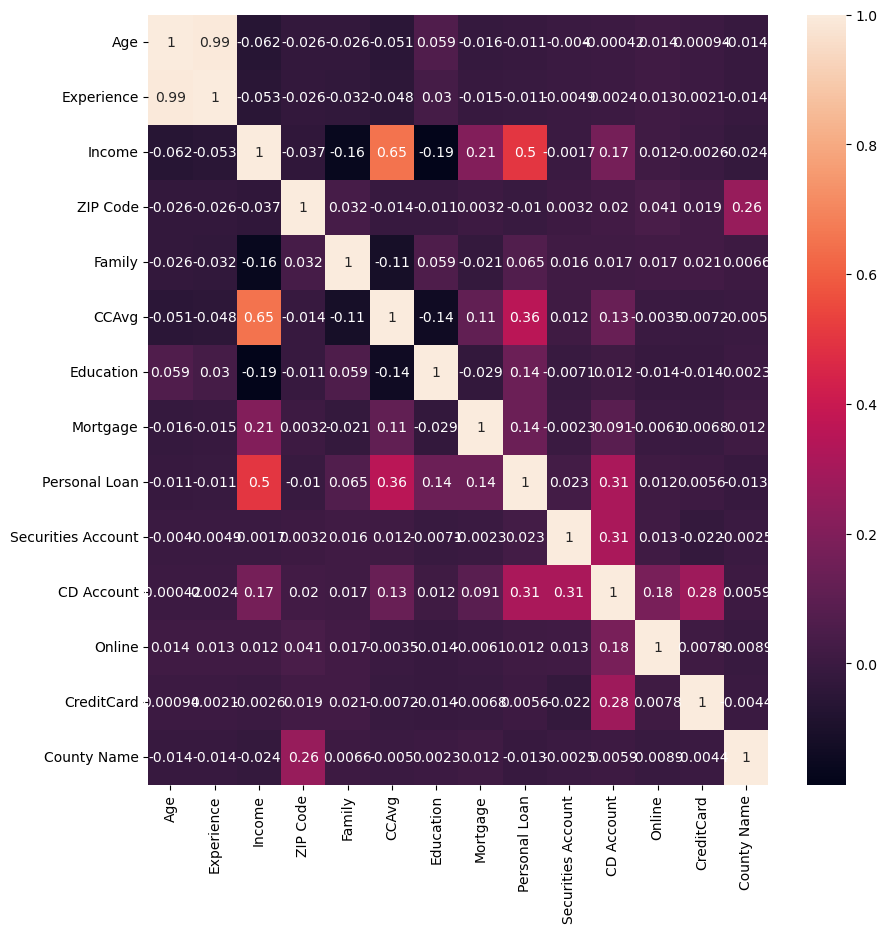

In [73]:
#visualization heatmap

fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True);

C:\Users\ideod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


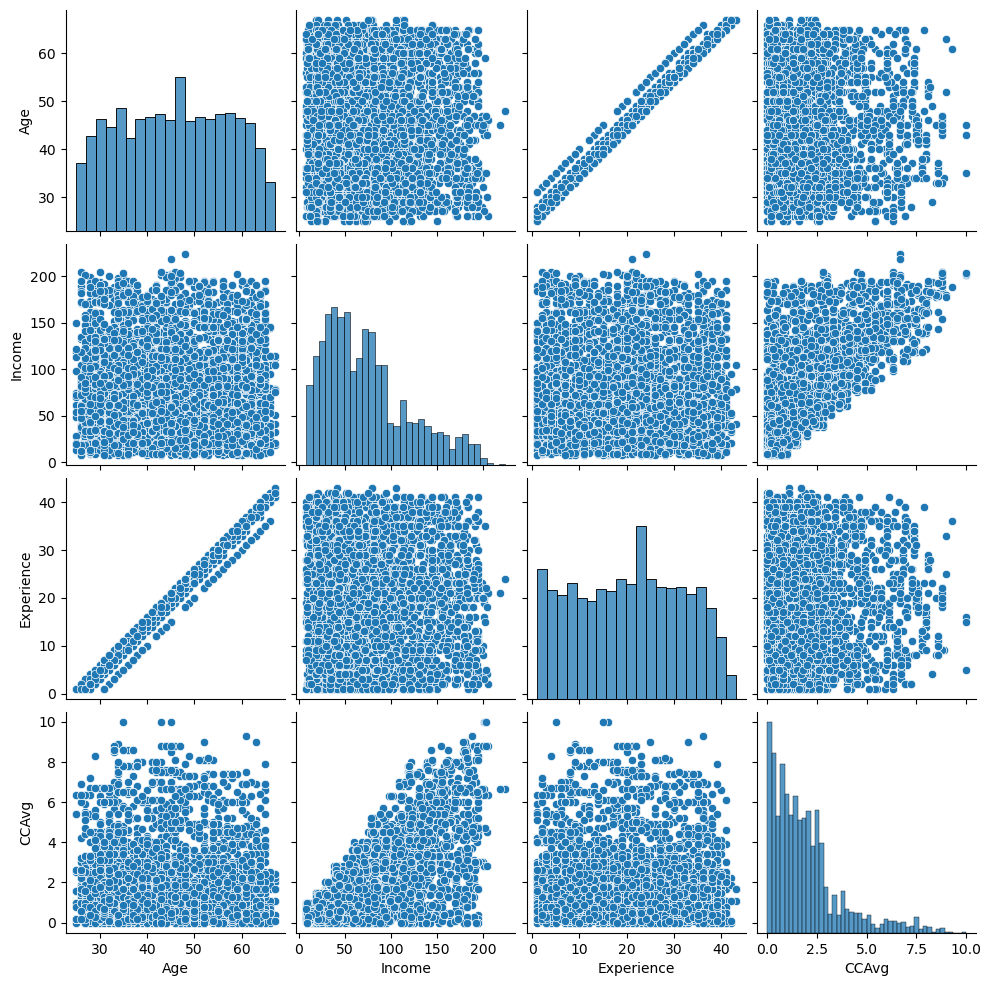

In [74]:
#visualization (pairplot) to show relationships between numerical columns
sns.pairplot(df[['Age', 'Income', 'Experience', 'CCAvg']]);

In [75]:
# pair plot conclusion from above 
print ("There is a direct strong relationship between age and Experience")

There is a direct strong relationship between age and Experience


In [76]:
#my feedback
print ("FEEBACK")
print ("overall a good data analysis with effective use of visualizations")
print ("The visualizations show relationships between attributes and target")


FEEBACK
overall a good data analysis with effective use of visualizations
The visualizations show relationships between attributes and target


In [77]:
# correction in the wording
print ("The wording needs to be corrected")
print ("Depositors are asset customers and borrowers are liability customers")
print ("The text has it vice versa")

The wording needs to be corrected
Depositors are asset customers and borrowers are liability customers
The text has it vice versa


In [78]:
#observation on education countplot
print ("The above codes for barplots don't specify type of education categories i.e. undergraduate, graduate , professional etc")
print ("The above codes are only able to label 1, 2 and 3 for each of the categories")

The above codes for barplots don't specify type of education categories i.e. undergraduate, graduate , professional etc
The above codes are only able to label 1, 2 and 3 for each of the categories
